 #  <span style="color:brown">  -------- Male & Female Classification - CNN Project -------- </span>


# Importing Libraries

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, AvgPool2D
from tensorflow.keras.utils import to_categorical

In [4]:
#since varius images may be of various sizes so we need to reshape all the images to the same shape
image_size = 200
path3 = r"E:\CNN\malefemale"
cate = ['men', 'women']

input_image = [] #list
for i in cate:
    folders = os.path.join(path3, i) #entering into folder
    label = cate.index(i)            #giving label()
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)  #reading the image
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array,(image_size, image_size))     
        input_image.append([image_array, label])

In [5]:
len(input_image)

2200

In [6]:
#random sampling
import numpy as np
np.random.shuffle(input_image)

In [7]:
#currently our x & y are together. Let's seprate them

x = []
y = []

for x_values, labels in input_image:
    x.append(x_values)
    y.append(labels)

# Splitting The Data

In [8]:
0.8*2200

1760.0

In [9]:
x_train = x[0:1760]
y_train = y[0:1760]

x_test = x[1760:2200]
y_test = y[1760:2200] 

In [10]:
x = np.array(x)
y = np.array(y)

In [11]:
x = x/255 #max no.of pixel

# Model Building

In [31]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(AvgPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(AvgPool2D(pool_size=(2,2)))

model.add(Flatten()) #flatten the image

model.add(Dense(64, activation='relu'))   #hidden layer
model.add(Dropout(0.3)) #randomly remove 30% of neuron

model.add(Dense(2, activation='softmax')) #o/p layer

In [32]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(x,y, epochs = 5)

Epoch 1/5
69/69 [==============================] - 110s 1s/step - loss: 0.7487 - accuracy: 0.4932
Epoch 2/5
69/69 [==============================] - 104s 2s/step - loss: 0.6869 - accuracy: 0.5582
Epoch 3/5
69/69 [==============================] - 103s 1s/step - loss: 0.6122 - accuracy: 0.6745
Epoch 4/5
69/69 [==============================] - 108s 2s/step - loss: 0.4891 - accuracy: 0.7618
Epoch 5/5
69/69 [==============================] - 106s 2s/step - loss: 0.3296 - accuracy: 0.8609


# Evaluation

In [34]:
import numpy as np

x_test = np.array(x_test)  # Convert x_test to NumPy array if it's not already
x_test = x_test.reshape(-1, image_size, image_size, 3)


In [35]:
pred = model.predict(x_test)

14/14 [==============================] - 4s 285ms/step


In [36]:
pred_classes = pred.argmax(axis=1)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
confusion_matrix(y_test, pred_classes)

array([[216,  13],
       [ 13, 198]], dtype=int64)

In [39]:
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       229
           1       0.94      0.94      0.94       211

    accuracy                           0.94       440
   macro avg       0.94      0.94      0.94       440
weighted avg       0.94      0.94      0.94       440



# ---------------------------------------------------------------------------------------------------------------

# Saving The Model

In [40]:
#tosave the model
model.save("malefemale.h5") #defalut path ->pwd

In [41]:
#to load the model
from keras.models import load_model

In [42]:
var = load_model("malefemale.h5")

In [43]:
var.predict(x_test)

14/14 [==============================] - 5s 285ms/step


array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.95983202e-15],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [6.44688525e-09, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.000000

# ---------------------------------------------------------------------------------------------------------------

# Testing, Making Prediction

In [2]:
import cv2
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("malefemale.h5")

In [3]:
# Function to preprocess and predict the class of a single image
def predict_image(image_path, model, image_size=200):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return None, None
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, (image_size, image_size)) / 255.0
    image_expanded = np.expand_dims(image_resized, axis=0)

    prediction = model.predict(image_expanded)
    category = ['men', 'women']
    predicted_label = category[np.argmax(prediction)]
    
    return image_rgb, predicted_label

In [4]:
# Function to display the image with the predicted label
def display_image_with_label(image_path, model):
    image, predicted_label = predict_image(image_path, model)
    if image is not None:
        plt.imshow(image)
        plt.title(f'Predicted Category: {predicted_label}')
        plt.axis('off')
        plt.show()

1/1 [==============================] - 0s 42ms/step


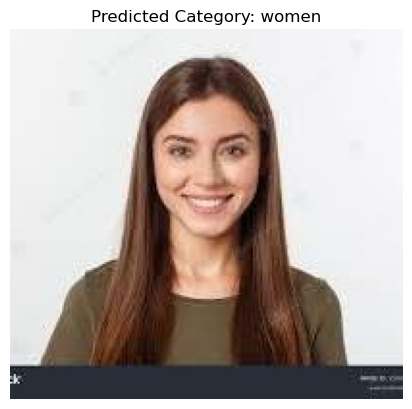

In [6]:
# Example usage 1 for an image
image_path = "E:\\CNN\\malefemale\\test\\img1.jpg"
display_image_with_label(image_path, model)

1/1 [==============================] - 0s 28ms/step


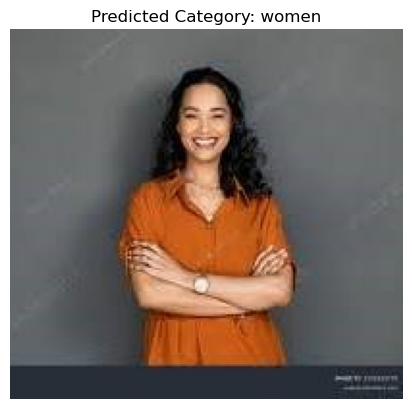

In [7]:
# Example usage 2 for an image
image_path = "E:\\CNN\\malefemale\\test\\img2.jpg"
display_image_with_label(image_path, model)

1/1 [==============================] - 0s 90ms/step


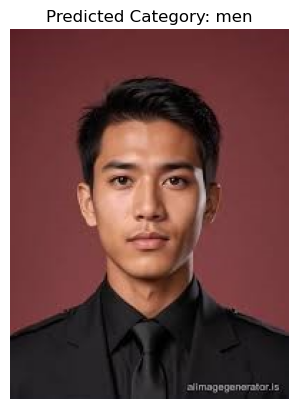

In [14]:
# Example usage 3 for an image
image_path = "E:\\CNN\\malefemale\\test\\img9.jpg"
display_image_with_label(image_path, model)

1/1 [==============================] - 0s 46ms/step


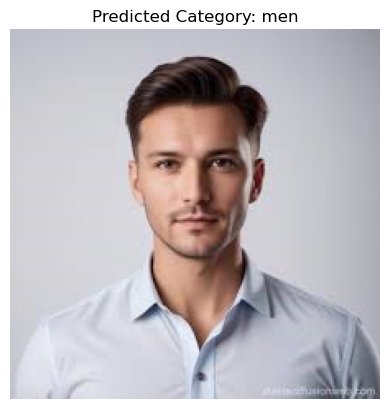

In [22]:
# Example usage 3 for an image
image_path = "E:\\CNN\\malefemale\\test\\img13.jpg"
display_image_with_label(image_path, model)